### Урок 1. Линейное пространство#

### -- Автор: Шенк Евгений Станиславович

### Задание 1.

 Выберите наборы данных. которые можно интерпретировать, как временные ряды:  
 
 а) зависимость цены на недвижимость в конкретном регионе от времени,

 б) скорость полета самолета при перелете из аэропорта А в аэропорт В,

 в) количество отказов компьютера,

 г) число обращений в поликлинику по району,

 д) координаты автобуса при движении по маршруту,

 е) координаты фигуры нарушителя в файле видеофиксации охранной системы.

Ответ:  
временные ряды: а, б, д, е  
в данных наборах важна динамика и время является определяющим фактором  
    
НЕ временные ряды: в, г  
в данных наборах скорре важны другие факторы, чем связь со временем или последовательностью наблюдений.

### Задание 2.

 Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с
информацией о потреблении энергии в одном из районов Восточной Электросети США.
Сделайте описание особенностей этой выборки.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np 
import pandas as pd 
import seaborn as sns
import pandas_profiling
import datetime

from sklearn.metrics import mean_squared_error

import os

In [2]:
data = pd.read_csv('DUQ_hourly.csv', index_col=[0], parse_dates=[0])

In [3]:
data.head(3)

,DUQ_MW
Datetime,
2005-12-31 01:00:00,1458.0
2005-12-31 02:00:00,1377.0
2005-12-31 03:00:00,1351.0


In [4]:
data.describe()

,DUQ_MW
count,119068.000000
mean,1658.820296
std,301.740640
min,1014.000000
25%,1444.000000
50%,1630.000000
75%,1819.000000
max,3054.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   DUQ_MW  119068 non-null  float64
dtypes: float64(1)
memory usage: 1.8 MB


Text(0, 0.5, 'МВт')

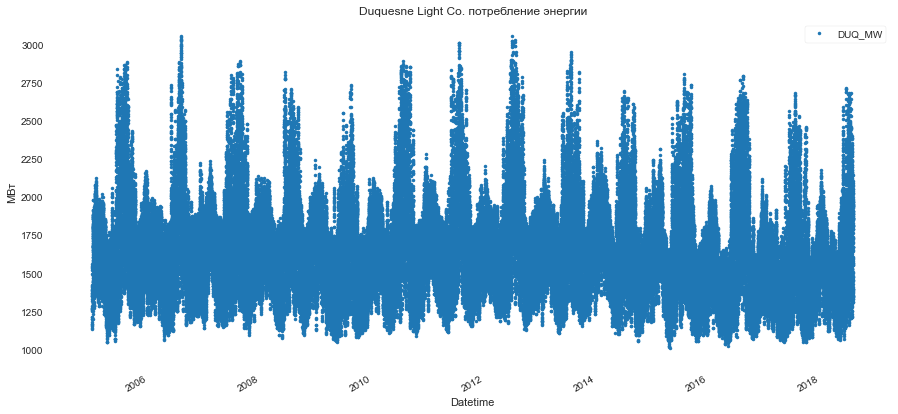

In [6]:
data.plot( style = '.', figsize = ( 15, 7 ), title = 'Duquesne Light Co. потребление энергии' )
plt.ylabel ( 'МВт' )

In [7]:
data['date'] = data.index

In [8]:
# Проверка пропусков
data['DUQ_MW'].isnull().sum()

0

In [9]:
pandas_profiling.ProfileReport(data)

In [10]:
data['date'].value_counts().head()

2017-11-05 02:00:00    2
2014-11-02 02:00:00    2
2015-11-01 02:00:00    2
2016-11-06 02:00:00    2
2007-07-15 10:00:00    1
Name: date, dtype: int64

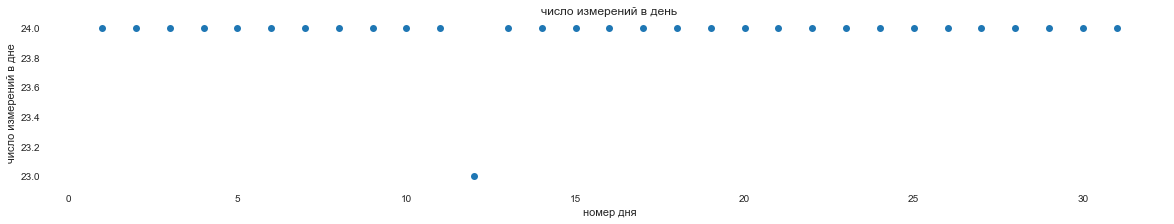

In [11]:
day_H=data['2017-03-01 00:00:00':'2017-03-31 23:00:00'].index.day

plt.figure(figsize=(20,3))
plt.plot(day_H.value_counts().index, day_H.value_counts().values ,'o')

plt.xlabel('номер дня')
plt.ylabel('число измерений в дне')
plt.title('число измерений в день')
plt.show()

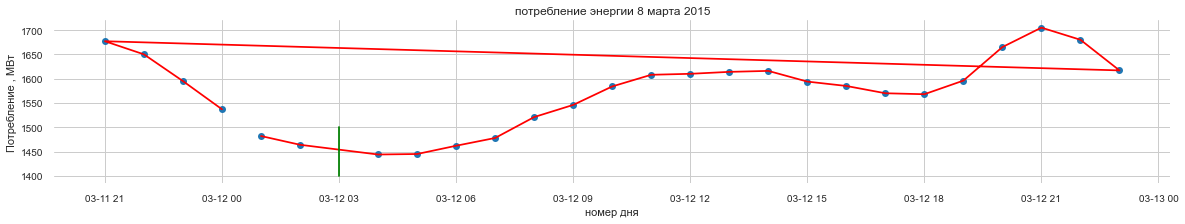

In [12]:
plt.figure(figsize=(20,3))
plt.plot(data['2017-03-11 21:00:00':'2017-03-12 23:00:00'].index,data['2017-03-11 21:00:00':'2017-03-12 23:00:00']['DUQ_MW'].values, 'o')
plt.plot(data['2017-03-11 21:00:00':'2017-03-12 23:00:00'].index,data['2017-03-11 21:00:00':'2017-03-12 23:00:00']['DUQ_MW'].values, 'r')
line_ = pd.to_datetime(pd.Series(['2017-03-12 03:00:00', '2017-03-12 03:00:00']))
plt.plot(line_,np.array([1400,1500]),'g')
plt.grid()
plt.xlabel('номер дня')
plt.ylabel('Потребление , МВт')
plt.title('потребление энергии 8 марта 2015')

plt.show()

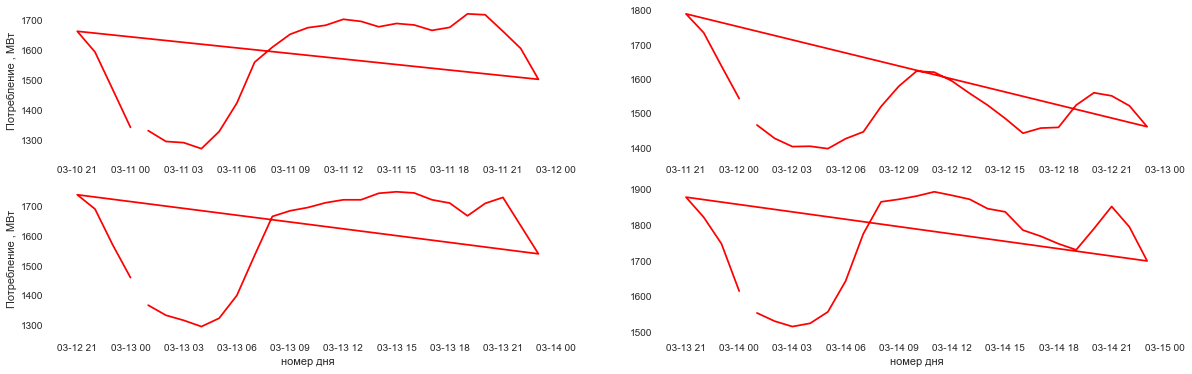

In [13]:
plt.figure(figsize=(20,6))
plt.subplot(2,2,1)
plt.plot(data['2010-03-10 21:00:00':'2010-03-11 23:00:00'].index,data['2010-03-10 21:00:00':'2010-03-11 23:00:00']['DUQ_MW'].values, 'r')
plt.ylabel('Потребление , МВт')

plt.subplot(2,2,2)
plt.plot(data['2011-03-11 21:00:00':'2011-03-12 23:00:00'].index,data['2011-03-11 21:00:00':'2011-03-12 23:00:00']['DUQ_MW'].values, 'r')

plt.subplot(2,2,3)
plt.plot(data['2012-03-12 21:00:00':'2012-03-13 23:00:00'].index,data['2012-03-12 21:00:00':'2012-03-13 23:00:00']['DUQ_MW'].values, 'r')
plt.ylabel('Потребление , МВт')
plt.xlabel('номер дня')

plt.subplot(2,2,4)
plt.plot(data['2013-03-13 21:00:00':'2013-03-14 23:00:00'].index,data['2013-03-13 21:00:00':'2013-03-14 23:00:00']['DUQ_MW'].values, 'r')
plt.xlabel('номер дня')

plt.show()

### Выводы:
    

1. В данных отсутствуют пропуски данных
2. В данных на первый взгляд не видно аномалий/выбросов
3. По визуальным данным видны циклы
4. Так же как и у набора PJME_hourly.csv присутствует проблема с переходом на зимнее/летнее время. Имеются дни с замерами с одинаковыми время/дата и пропуски. Нужно заполнить пропуски и убрать повторы.
5. Данные же как и у набора PJME_hourly.csv записаны не по порядку (видно на последних графиках). Нужно отсортировать набор.

### Задание 3, 4, 5.

Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям ,
по месяцам.

Постройте график изменения среднего по выборке и среднего отклонения по выборке на
недельных, месячных и годовых группах для Brent.

 Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках
по сравнению с годовым.

In [14]:
data_brent = pd.read_excel('нефть-brent 2010-2019.xlsx', index_col=[0], parse_dates=[0])

In [15]:
data_brent.head()

,Значение
Дата,
2019-09-01,58.84
2019-08-30,59.19
2019-08-29,60.37
2019-08-28,59.84
2019-08-27,59.59


Text(0.5, 0, 't')

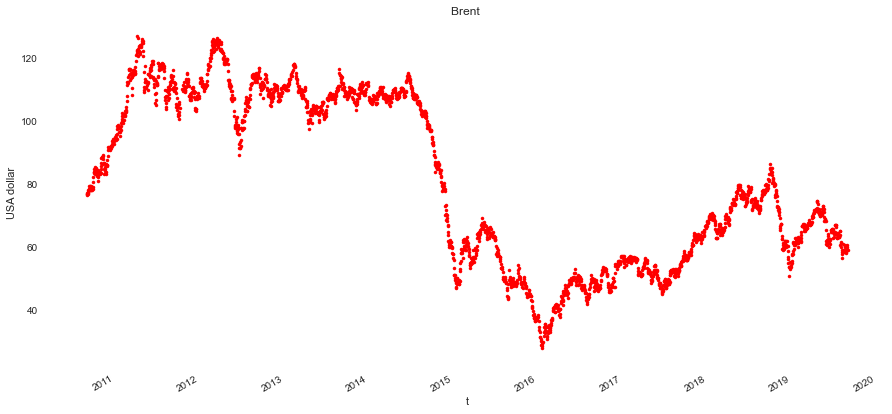

In [16]:
_ = data_brent['Значение'].plot( style='.', figsize=( 15, 7 ), title='Brent ', color='red')
plt.ylabel('USA dollar')
plt.xlabel('t')

In [17]:
data_brent_M = data_brent.resample("M").mean()
data_brent_W = data_brent.resample("W").mean()
data_brent_Y = data_brent.resample("Y").mean()
data_brent_M_std = data_brent.resample("M").std()
data_brent_W_std = data_brent.resample("W").std()
data_brent_Y_std = data_brent.resample("Y").std()

Text(0.5, 1.0, 'нефть-brent, MEAN')

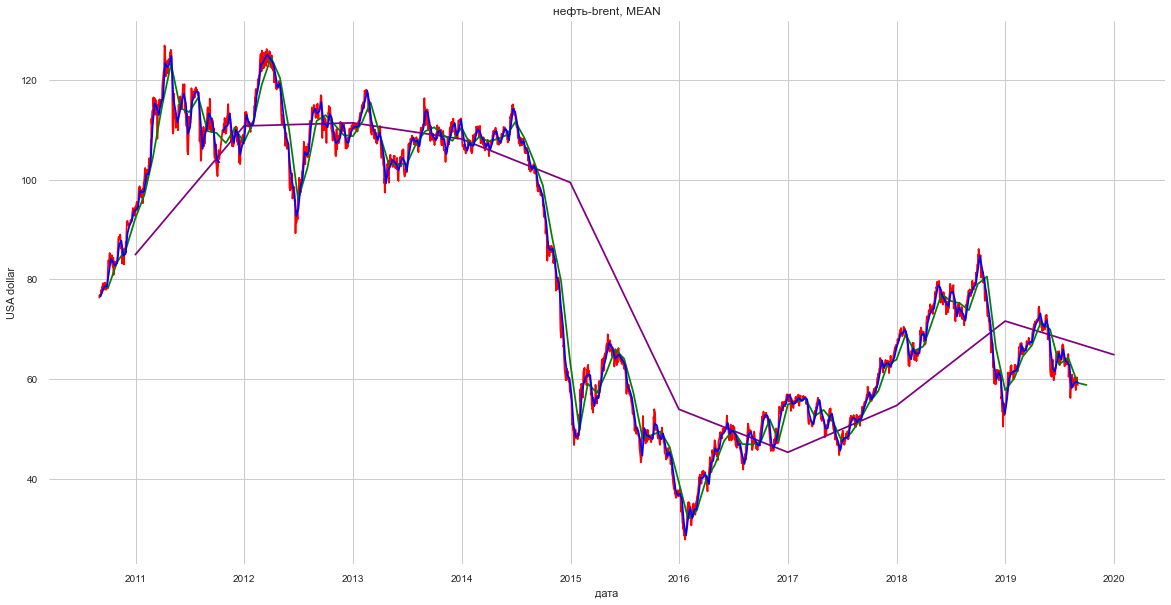

In [18]:
plt.figure(figsize=(20,10))
plt.plot(data_brent, 'r', color='red')
plt.plot(data_brent_Y, 'r', color='purple')
plt.plot(data_brent_M, 'r', color='green')
plt.plot(data_brent_W, 'r', color='blue')
plt.grid()
plt.xlabel('дата')
plt.ylabel('USA dollar')
plt.title('нефть-brent, MEAN')

Text(0.5, 1.0, 'нефть-brent, MEAN')

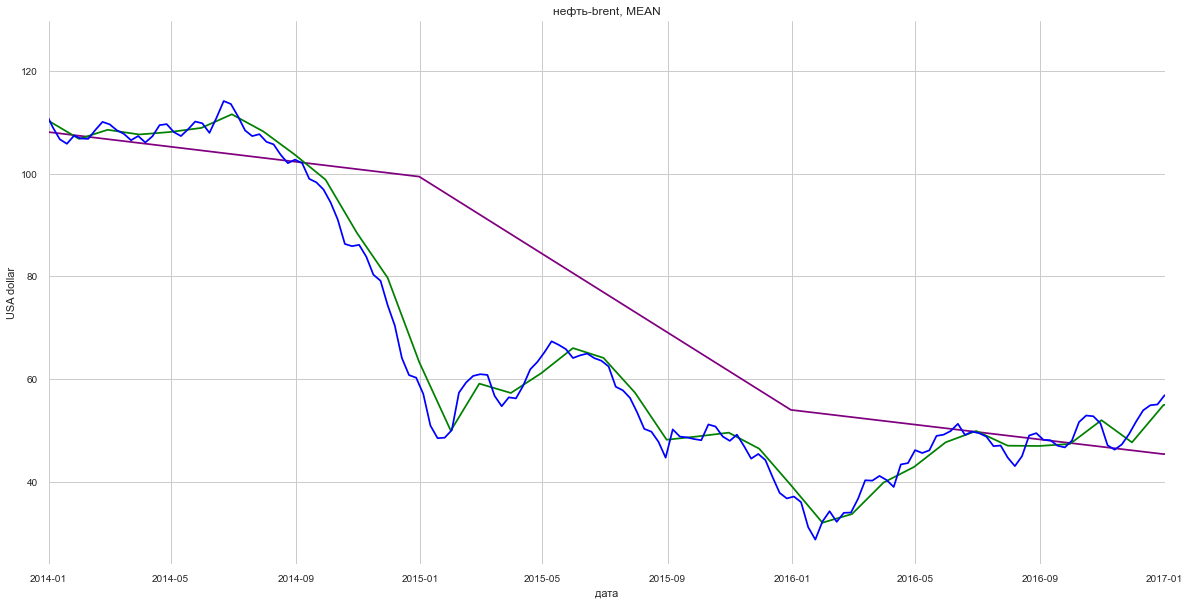

In [19]:
plt.figure(figsize=(20,10))
#plt.plot(data_brent, 'r', color='red')
plt.plot(data_brent_Y, 'r', color='purple')
plt.plot(data_brent_M, 'r', color='green')
plt.plot(data_brent_W, 'r', color='blue')
plt.grid()
plt.xlim(datetime.datetime(2014,1,1), datetime.datetime(2017,1,1))
plt.xlabel('дата')
plt.ylabel('USA dollar')
plt.title('нефть-brent, MEAN')

Text(0.5, 1.0, 'нефть-brent, STD')

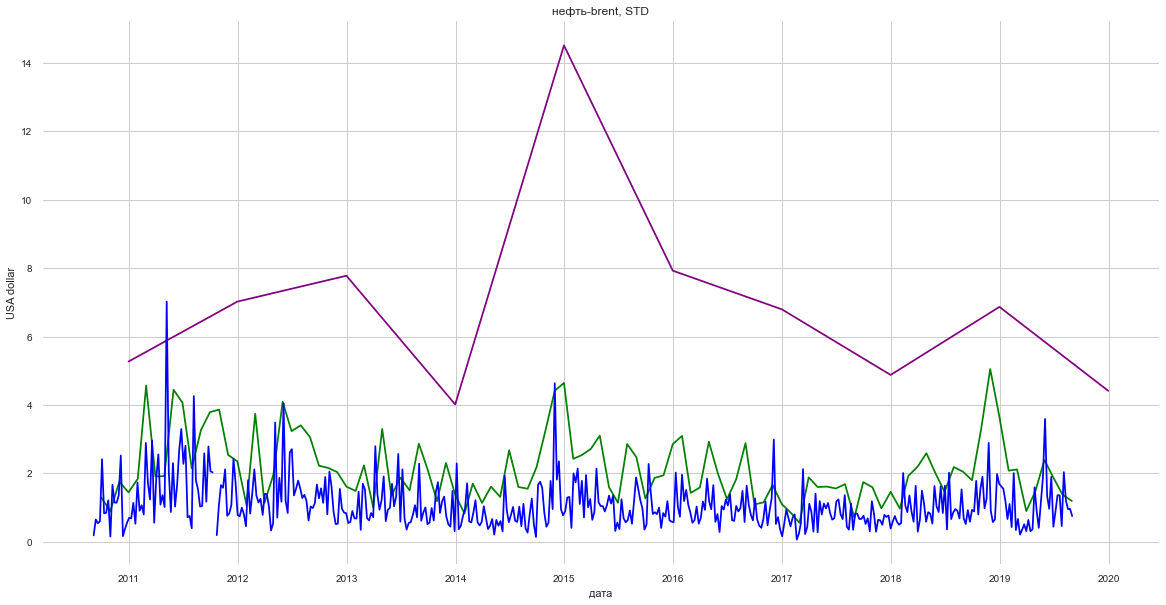

In [20]:
plt.figure(figsize=(20,10))
plt.plot(data_brent_Y_std, 'r', color='purple')
plt.plot(data_brent_M_std, 'r', color='green')
plt.plot(data_brent_W_std, 'r', color='blue')
plt.grid()
plt.xlabel('дата')
plt.ylabel('USA dollar')
plt.title('нефть-brent, STD')

#### Выводы:
##### Поведение цены на недельных и месячных графиках больше отражает реальную тенденцию изменения цены на нефть, чем на годовом. Годовой график отражает только общую тенденцию, еще и с запозданием. Месячный график тоже запаздывает, но не сильно. Средние отклонение для месячных и недельных графиков находятся в одном диапазоне, когда в годовом в разы выше.